# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [ ]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

In [2]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product


In [3]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
def is_shattered(d, n, S_n,visualize=False):
    S_n = np.array(S_n)
    classes = list(product([0, 1], repeat=n))
    unique_classes = []
    outcome = True
    for c in classes:
        c = list(c)
        c_reversed = [0 if x == 1 else 1 for x in c]
        if c_reversed not in unique_classes and c not in unique_classes:
            unique_classes.append(c)
    for y in np.array(unique_classes):
        if sum(y) == 0 or sum(y) == n:
            continue
        svc  = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svc.fit(S_n, y)
        if visualize and d ==2:
            plt.plot(S_n[y==0,0],S_n[y==0,1],'ro')
            plt.plot(S_n[y==1,0],S_n[y==1,1],'bo')
            x = np.linspace(np.min(S_n[:,0])-0.1,np.max(S_n[:,0])+0.1,100)
            if svc.coef_[0,1] == 0:
                plt.axvline(x=-svc.intercept_[0]/svc.coef_[0,0])
                plt.show()
                continue
            val = (-svc.intercept_[0]-svc.coef_[0,0]*x)/svc.coef_[0,1]
            plt.xlim(np.min(S_n[:,0])-0.1,np.max(S_n[:,0])+0.1)
            plt.ylim(np.min(S_n[:,1])-0.1,np.max(S_n[:,1])+0.1)
            plt.plot(x,val)
            plt.show()
        if svc.score(S_n, y) != 1.0:
            outcome = False
    return outcome

In [114]:
is_shattered(2, 3, [[0, 0], [1, 1], [2, 2]])

False

In [115]:
is_shattered(2, 3, [[0, 0], [1, 1], [0, 1]])

True

### c)

In [ ]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

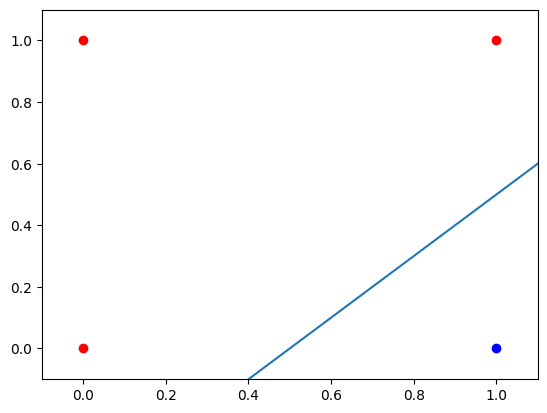

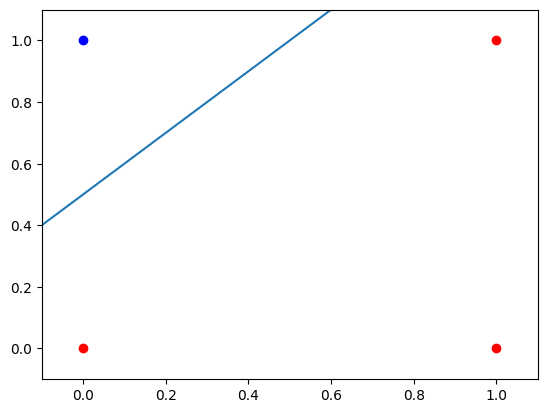

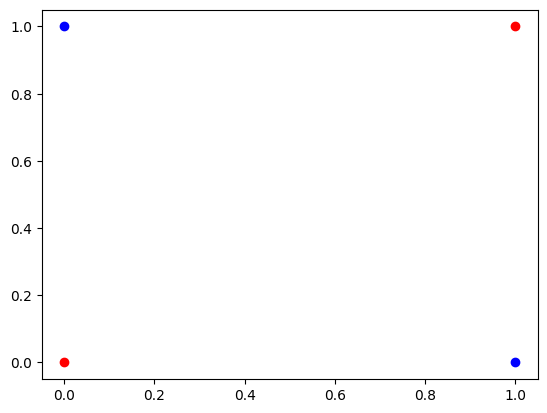

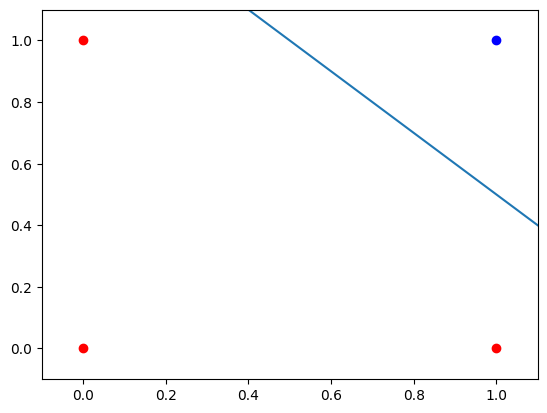

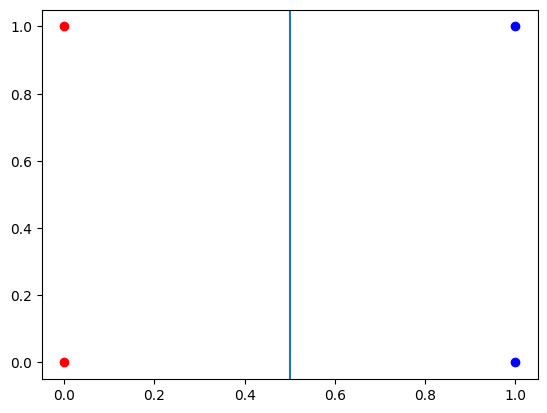

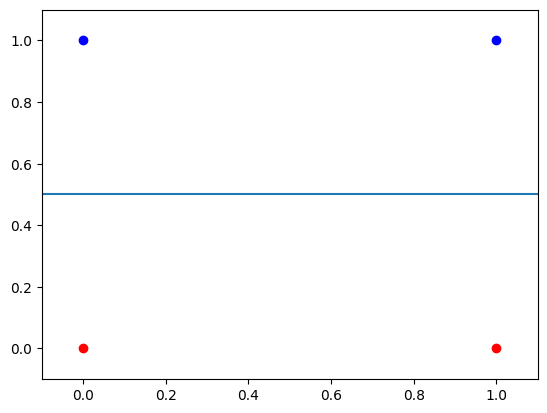

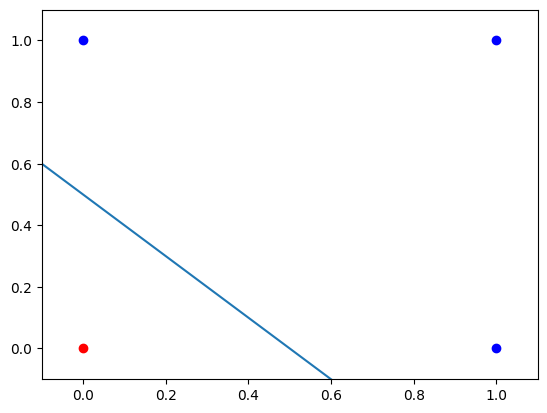

True

In [118]:
is_shattered(2, 4, [[0, 0], [1, 1], [0, 1], [1, 0]],visualize=True)

### d)

In [32]:
# code
vc = {}
for d in range(2,11):
    for n in list(range(2,20)):
        shattered = False
        for _ in range(50):
            S_n = np.random.normal(size=(n,d))
            shattered = is_shattered(d,n,S_n)
            if shattered:
                break
        if not shattered:
            vc[d] = n 
            break

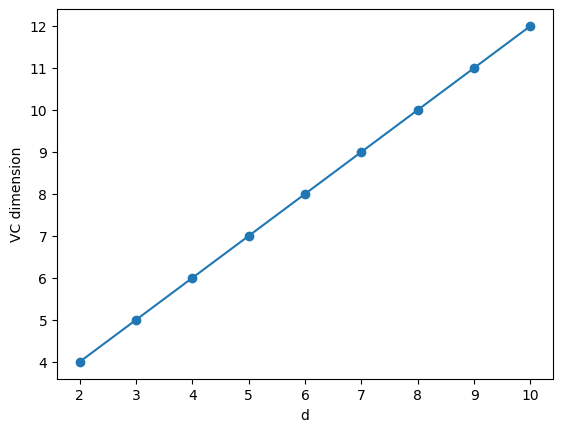

In [31]:
plt.plot(vc.keys(),vc.values(),'-o')
plt.xlabel('d')
plt.ylabel('VC dimension')
plt.show()